In [1]:
# Trabalho com o MNIST - numeros manuscritos
from keras.datasets import mnist
from keras.utils import to_categorical
#Modelo da rede
from keras.models import Sequential
#Camadas que serão utilizadas
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


# Carregando o dataset separando os dados de treino e de teste
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# Trazendo a função `to_categorical` para transformar os labels em one-hot encoding
y_treino_cat = to_categorical(y_treino)
y_teste_cat = to_categorical(y_teste)

# Normalização dos dados de entrada
x_treino_norm = x_treino/x_treino.max()
x_teste_norm = x_teste/x_teste.max()

# Reshape dos dados de entrada para adicionar o canal de cor
x_treino_flat = x_treino.reshape(len(x_treino_norm), 28*28)
x_teste_flat = x_teste.reshape(len(x_teste_norm), 28*28)


# Criação do modelo LeNet5
model = Sequential()
model.add(Dense(10, activation='softmax',input_shape=(28*28,)))


C:\Users\Inteli\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [2]:
# Constroi o modelo
model.build()
# Exibe um resumo do modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
#Compila o modelo
from keras.optimizers import Adam
adam = Adam()
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer=adam)

# Realiza o treinamento do modelo
historico = model.fit(x_treino_flat, y_treino_cat, epochs=10,validation_split=0.2)

model.save('models/modelo_mnist_linear.h5')

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7483 - loss: 20.6198 - val_accuracy: 0.8689 - val_loss: 6.3776
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 6.0243 - val_accuracy: 0.8763 - val_loss: 6.3596
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8770 - loss: 5.9687 - val_accuracy: 0.8860 - val_loss: 5.9258
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8864 - loss: 5.2945 - val_accuracy: 0.8731 - val_loss: 6.3765
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8845 - loss: 5.3871 - val_accuracy: 0.8844 - val_loss: 5.5490
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8894 - loss: 5.1244 - val_accuracy: 0.9042 - val_loss: 5.0701
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8884 - loss: 5.4243 - val_accuracy: 0.8918 - val_loss: 5.4454
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8865 - loss: 5.2386 -

Text(0, 0.5, 'accuracy')

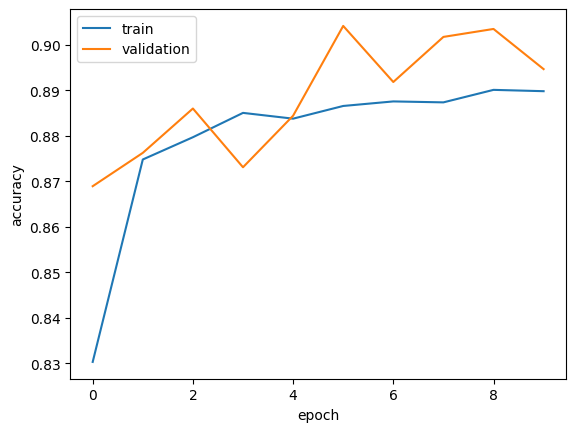

In [4]:
from matplotlib import pyplot as plt

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.legend(['train', 'validation'])
plt.xlabel('epoch')
plt.ylabel('accuracy')